# Audio Classification Data Preprocessing

In [1]:
### Let's read a sample audio using librosa
import librosa
audio_file_path='urbansound8k/audio/fold7/104625-4-0-48.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [2]:
print(librosa_audio_data)

[-0.00941383  0.02041784  0.05229013 ... -0.08863448 -0.07429632
 -0.04866834]


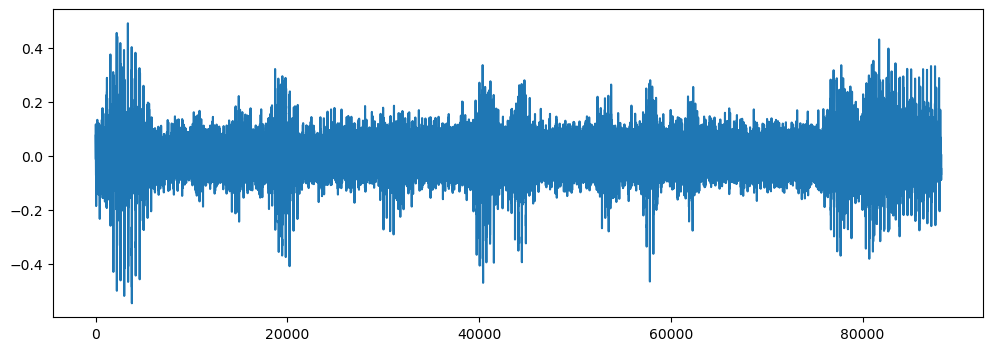

In [3]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

# Observation
Here Librosa converts the signal to mono, meaning the channel will alays be 1

In [4]:
### Lets read with scipy
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path)

In [5]:
wave_audio

array([[-181144576,   91192320],
       [-180943104,  128070144],
       [-175679488,  167874304],
       ...,
       [ -23593472, -115433984],
       [ -13455872, -101465088],
       [ -14263296,  -90984960]])

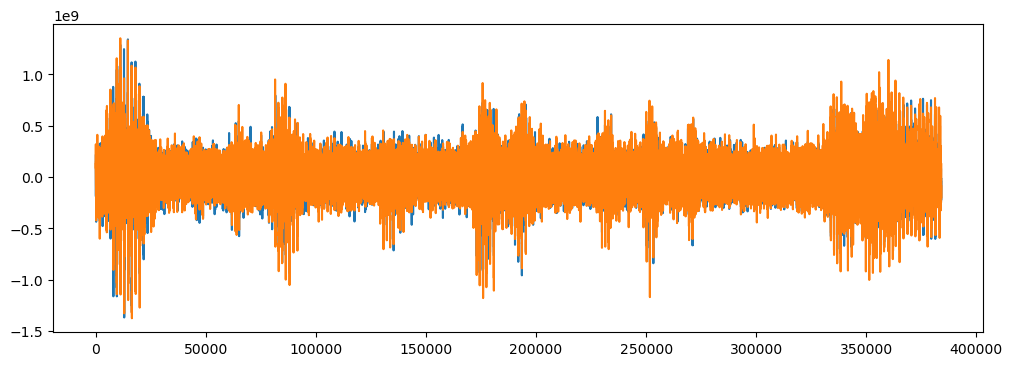

In [6]:
import matplotlib.pyplot as plt

# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

# Extract Features
Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio samples. The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

In [7]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [8]:
mfccs

array([[-1.3317194e+02, -9.3563942e+01, -7.3856873e+01, ...,
        -7.7362350e+01, -7.7674667e+01, -1.0271704e+02],
       [ 6.4038887e+01,  6.4641373e+01,  7.3607628e+01, ...,
         8.5476547e+01,  8.5772926e+01,  8.5574158e+01],
       [-2.6814411e+01, -2.1600952e+01, -9.3929558e+00, ...,
        -1.0772629e+01, -8.9618950e+00, -4.2991858e+00],
       ...,
       [-3.9145763e+00, -9.3051887e-01, -1.0166228e+00, ...,
        -1.2913525e-02,  1.8536069e+00,  4.2035034e-01],
       [-5.1554620e-01,  1.1950059e+00, -4.4984579e-02, ...,
        -1.3768796e+00, -2.4618702e+00, -3.5131736e+00],
       [-2.7240510e+00, -3.6483235e+00, -2.8226120e+00, ...,
        -2.9390317e-01, -3.1122169e+00, -1.3308339e+00]], dtype=float32)

In [9]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path='UrbanSound8K/audio/'
metadata=pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [10]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [11]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3555it [09:42,  6.30it/s]C:\Users\LENOVO\anaconda3\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8324it [20:33, 10.97it/s]C:\Users\LENOVO\anaconda3\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
8327it [20:33, 14.69it/s]C:\Users\LENOVO\anaconda3\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [21:23,  6.80it/s]


In [12]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-217.35526, 70.22338, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.520657, 52.00812, ...",children_playing
3,"[-413.89984, 101.66373, -35.42945, 53.036354, ...",children_playing
4,"[-446.60352, 113.68541, -52.402206, 60.302044,...",children_playing


In [13]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [14]:
X.shape

(8732, 40)

In [15]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [16]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [17]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [18]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [19]:
X_train

array([[-1.31104706e+02,  1.12505905e+02, -2.25746956e+01, ...,
         3.24665260e+00, -1.36902368e+00,  2.75575495e+00],
       [-1.36703424e+01,  9.10850830e+01, -7.79273319e+00, ...,
        -3.25305033e+00, -5.27745247e+00, -1.55697143e+00],
       [-4.98715439e+01,  2.65352994e-01, -2.05009365e+01, ...,
         2.85459447e+00, -1.60920441e+00,  3.52480578e+00],
       ...,
       [-4.27012360e+02,  9.26230469e+01,  3.12939739e+00, ...,
         7.42641389e-01,  7.33490825e-01,  7.11009085e-01],
       [-1.45754608e+02,  1.36265778e+02, -3.35155220e+01, ...,
         1.46811950e+00, -2.00917006e+00, -8.82181883e-01],
       [-4.21031342e+02,  2.10654541e+02,  3.49066067e+00, ...,
        -5.38886738e+00, -3.37136054e+00, -1.56651151e+00]], dtype=float32)

In [20]:
X_train.shape

(6985, 40)

In [21]:
X_test.shape

(1747, 40)

In [22]:
y_train.shape

(6985, 10)

In [23]:
y_test.shape

(1747, 10)

In [24]:
num_labels=y.shape[1]

In [25]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten

In [26]:
from tensorflow.keras.models import Sequential

In [27]:
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten

In [28]:
def create_model(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes,input_shape=(40,)))
            model.add(Activation(activation))
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation))
    model.add(Dense(num_labels))
    model.add(Activation('softmax'))
    
    model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
    return model
    
model = KerasClassifier(build_fn=create_model, verbose=0)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6024\3766658193.py:16: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


In [29]:
model

In [30]:
layers = [[200, 300, 400,500],[200,400,600]]
activations = ['relu']
param_grid = dict(layers=layers, activation=activations, batch_size = [64,128,256], epochs=[100,200])
grid = GridSearchCV(estimator=model, param_grid=param_grid)

In [31]:
grid_result = grid.fit(X_train, y_train)

In [32]:
[grid_result.best_score_,grid_result.best_params_]

[0.9246957540512085,
 {'activation': 'relu',
  'batch_size': 128,
  'epochs': 200,
  'layers': [200, 300, 400, 500]}]

In [39]:
model=Sequential()
###first layer
model.add(Dense(200,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(300))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(400))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###fourth layer
model.add(Dense(500))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [40]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [41]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 200
num_batch_size = 128

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/200
51/55 [==========================>...] - ETA: 0s - loss: 11.5659 - accuracy: 0.1180
Epoch 1: val_loss improved from inf to 2.24796, saving model to saved_models\audio_classification.hdf5
55/55 [==============================] - 2s 15ms/step - loss: 11.0575 - accuracy: 0.1177 - val_loss: 2.2480 - val_accuracy: 0.2232
Epoch 2/200
54/55 [============================>.] - ETA: 0s - loss: 2.9291 - accuracy: 0.1343
Epoch 2: val_loss did not improve from 2.24796
55/55 [==============================] - 1s 11ms/step - loss: 2.9240 - accuracy: 0.1349 - val_loss: 2.2789 - val_accuracy: 0.1488
Epoch 3/200
52/55 [===========================>..] - ETA: 0s - loss: 2.4596 - accuracy: 0.1477
Epoch 3: val_loss did not improve from 2.24796
55/55 [==============================] - 1s 11ms/step - loss: 2.4596 - accuracy: 0.1470 - val_loss: 2.2749 - val_accuracy: 0.1345
Epoch 4/200
53/55 [===========================>..] - ETA: 0s - loss: 2.3205 - accuracy: 0.1599
Epoch 4: val_loss improved from

Epoch 26/200
53/55 [===========================>..] - ETA: 0s - loss: 1.4269 - accuracy: 0.5016
Epoch 26: val_loss improved from 1.34181 to 1.30675, saving model to saved_models\audio_classification.hdf5
55/55 [==============================] - 1s 15ms/step - loss: 1.4280 - accuracy: 0.5026 - val_loss: 1.3067 - val_accuracy: 0.5690
Epoch 27/200
55/55 [==============================] - ETA: 0s - loss: 1.4105 - accuracy: 0.5154
Epoch 27: val_loss improved from 1.30675 to 1.26951, saving model to saved_models\audio_classification.hdf5
55/55 [==============================] - 1s 14ms/step - loss: 1.4105 - accuracy: 0.5154 - val_loss: 1.2695 - val_accuracy: 0.6045
Epoch 28/200
53/55 [===========================>..] - ETA: 0s - loss: 1.3650 - accuracy: 0.5351
Epoch 28: val_loss improved from 1.26951 to 1.23096, saving model to saved_models\audio_classification.hdf5
55/55 [==============================] - 1s 13ms/step - loss: 1.3664 - accuracy: 0.5356 - val_loss: 1.2310 - val_accuracy: 0.603

54/55 [============================>.] - ETA: 0s - loss: 0.9589 - accuracy: 0.6774
Epoch 51: val_loss improved from 0.80484 to 0.78849, saving model to saved_models\audio_classification.hdf5
55/55 [==============================] - 1s 20ms/step - loss: 0.9596 - accuracy: 0.6769 - val_loss: 0.7885 - val_accuracy: 0.7481
Epoch 52/200
52/55 [===========================>..] - ETA: 0s - loss: 0.9392 - accuracy: 0.6801
Epoch 52: val_loss improved from 0.78849 to 0.76979, saving model to saved_models\audio_classification.hdf5
55/55 [==============================] - 1s 19ms/step - loss: 0.9401 - accuracy: 0.6789 - val_loss: 0.7698 - val_accuracy: 0.7527
Epoch 53/200
54/55 [============================>.] - ETA: 0s - loss: 0.9494 - accuracy: 0.6829
Epoch 53: val_loss improved from 0.76979 to 0.75942, saving model to saved_models\audio_classification.hdf5
55/55 [==============================] - 1s 19ms/step - loss: 0.9483 - accuracy: 0.6830 - val_loss: 0.7594 - val_accuracy: 0.7602
Epoch 54/20

52/55 [===========================>..] - ETA: 0s - loss: 0.7553 - accuracy: 0.7459
Epoch 77: val_loss did not improve from 0.57917
55/55 [==============================] - 1s 15ms/step - loss: 0.7517 - accuracy: 0.7467 - val_loss: 0.5825 - val_accuracy: 0.8300
Epoch 78/200
53/55 [===========================>..] - ETA: 0s - loss: 0.7457 - accuracy: 0.7599
Epoch 78: val_loss improved from 0.57917 to 0.56757, saving model to saved_models\audio_classification.hdf5
55/55 [==============================] - 1s 16ms/step - loss: 0.7419 - accuracy: 0.7611 - val_loss: 0.5676 - val_accuracy: 0.8248
Epoch 79/200
53/55 [===========================>..] - ETA: 0s - loss: 0.7454 - accuracy: 0.7519
Epoch 79: val_loss did not improve from 0.56757
55/55 [==============================] - 1s 14ms/step - loss: 0.7406 - accuracy: 0.7532 - val_loss: 0.5676 - val_accuracy: 0.8243
Epoch 80/200
55/55 [==============================] - ETA: 0s - loss: 0.7390 - accuracy: 0.7589
Epoch 80: val_loss did not improve 

53/55 [===========================>..] - ETA: 0s - loss: 0.6391 - accuracy: 0.7854
Epoch 105: val_loss improved from 0.48775 to 0.48307, saving model to saved_models\audio_classification.hdf5
55/55 [==============================] - 1s 13ms/step - loss: 0.6398 - accuracy: 0.7858 - val_loss: 0.4831 - val_accuracy: 0.8540
Epoch 106/200
54/55 [============================>.] - ETA: 0s - loss: 0.6227 - accuracy: 0.7908
Epoch 106: val_loss did not improve from 0.48307
55/55 [==============================] - 1s 12ms/step - loss: 0.6235 - accuracy: 0.7907 - val_loss: 0.5014 - val_accuracy: 0.8472
Epoch 107/200
52/55 [===========================>..] - ETA: 0s - loss: 0.6233 - accuracy: 0.7882
Epoch 107: val_loss did not improve from 0.48307
55/55 [==============================] - 1s 13ms/step - loss: 0.6232 - accuracy: 0.7873 - val_loss: 0.4997 - val_accuracy: 0.8552
Epoch 108/200
54/55 [============================>.] - ETA: 0s - loss: 0.6183 - accuracy: 0.7954
Epoch 108: val_loss improved 

Epoch 133/200
52/55 [===========================>..] - ETA: 0s - loss: 0.5863 - accuracy: 0.8127
Epoch 133: val_loss improved from 0.44263 to 0.44087, saving model to saved_models\audio_classification.hdf5
55/55 [==============================] - 1s 16ms/step - loss: 0.5863 - accuracy: 0.8126 - val_loss: 0.4409 - val_accuracy: 0.8666
Epoch 134/200
51/55 [==========================>...] - ETA: 0s - loss: 0.5806 - accuracy: 0.8130
Epoch 134: val_loss did not improve from 0.44087
55/55 [==============================] - 1s 13ms/step - loss: 0.5828 - accuracy: 0.8106 - val_loss: 0.4621 - val_accuracy: 0.8517
Epoch 135/200
55/55 [==============================] - ETA: 0s - loss: 0.5868 - accuracy: 0.8049
Epoch 135: val_loss did not improve from 0.44087
55/55 [==============================] - 1s 16ms/step - loss: 0.5868 - accuracy: 0.8049 - val_loss: 0.4565 - val_accuracy: 0.8598
Epoch 136/200
51/55 [==========================>...] - ETA: 0s - loss: 0.5705 - accuracy: 0.8088
Epoch 136: val_

Epoch 162/200
53/55 [===========================>..] - ETA: 0s - loss: 0.5455 - accuracy: 0.8196
Epoch 162: val_loss did not improve from 0.42148
55/55 [==============================] - 1s 20ms/step - loss: 0.5448 - accuracy: 0.8193 - val_loss: 0.4389 - val_accuracy: 0.8603
Epoch 163/200
55/55 [==============================] - ETA: 0s - loss: 0.5351 - accuracy: 0.8248
Epoch 163: val_loss did not improve from 0.42148
55/55 [==============================] - 1s 19ms/step - loss: 0.5351 - accuracy: 0.8248 - val_loss: 0.4500 - val_accuracy: 0.8683
Epoch 164/200
53/55 [===========================>..] - ETA: 0s - loss: 0.5362 - accuracy: 0.8283
Epoch 164: val_loss improved from 0.42148 to 0.41994, saving model to saved_models\audio_classification.hdf5
55/55 [==============================] - 1s 20ms/step - loss: 0.5365 - accuracy: 0.8272 - val_loss: 0.4199 - val_accuracy: 0.8729
Epoch 165/200
52/55 [===========================>..] - ETA: 0s - loss: 0.5103 - accuracy: 0.8365
Epoch 165: val_

Epoch 191/200
52/55 [===========================>..] - ETA: 0s - loss: 0.4914 - accuracy: 0.8407
Epoch 191: val_loss did not improve from 0.39182
55/55 [==============================] - 1s 12ms/step - loss: 0.4934 - accuracy: 0.8412 - val_loss: 0.4171 - val_accuracy: 0.8729
Epoch 192/200
55/55 [==============================] - ETA: 0s - loss: 0.5153 - accuracy: 0.8348
Epoch 192: val_loss did not improve from 0.39182
55/55 [==============================] - 1s 12ms/step - loss: 0.5153 - accuracy: 0.8348 - val_loss: 0.3951 - val_accuracy: 0.8821
Epoch 193/200
54/55 [============================>.] - ETA: 0s - loss: 0.5033 - accuracy: 0.8391
Epoch 193: val_loss did not improve from 0.39182
55/55 [==============================] - 1s 11ms/step - loss: 0.5038 - accuracy: 0.8391 - val_loss: 0.3930 - val_accuracy: 0.8809
Epoch 194/200
51/55 [==========================>...] - ETA: 0s - loss: 0.4990 - accuracy: 0.8361
Epoch 194: val_loss improved from 0.39182 to 0.38766, saving model to saved

In [42]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.8860904574394226
